In [1]:
#!nvidia-smi
#!pip install git+https://github.com/huggingface/diffusers.git
#!pip install diffusers==0.17.1
#!pip install transformers scipy ftfy accelerate
#!pip install torch==2.0.0+cu118 torchvision==0.15.1+cu118 torchaudio==2.0.1 --index-url https://download.pytorch.org/whl/cu118
from diffusers import StableDiffusionPipeline, AutoencoderKL, UNet2DConditionModel, PNDMScheduler, LMSDiscreteScheduler
import torch
import transformers
from transformers import CLIPTextModel, CLIPTokenizer
import torch

#x = torch.rand(5, 3)
#print(x)

#print(f'PyTorch version: {torch.__version__}')
#print('*'*10)
#print(f'_CUDA version: ')
#!nvcc --version
#print('*'*10)
#print(f'CUDNN version: {torch.backends.cudnn.version()}')
print(f'Available GPU devices: {torch.cuda.device_count()}')
#print(f'Device Name: {torch.cuda.get_device_name()}')

C:\Users\evanm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Available GPU devices: 1


In [2]:
#import os
#print(os.listdir("../assets"))
model_path = "../assets/stable-diffusion-v1-5"
sdui_path = "../../../stable-diffusion-webui/models/Stable-diffusion"
vae = AutoencoderKL.from_pretrained(model_path, subfolder="vae")
pipe = None
#scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)
#tokenizer = CLIPTokenizer.from_pretrained(model_path, subfolder="tokenizer")
#text_encoder = CLIPTextModel.from_pretrained(model_path, subfolder="text_encoder")

# 3. The UNet model for generating the latents.
#unet = UNet2DConditionModel.from_pretrained(model_path, subfolder="unet")
#unet = UNet2DConditionModel.from_pretrained(sdui_path , weights_name="deliberate_v11.safetensors")
#pipe = StableDiffusionPipeline(
#    vae=vae,
#    text_encoder=text_encoder,
#    tokenizer=tokenizer,
#    unet=unet,
#    scheduler=scheduler,
#    safety_checker=None,
#    feature_extractor=None,
#    requires_safety_checker=None
#)
pipe = StableDiffusionPipeline.from_ckpt(sdui_path + "/analog-diffusion-1.0.ckpt",
                                         torch_dtype=torch.float16,
                                         use_safetensors=False, 
                                         vae=vae)
#pipe.unet.load_attn_procs(sdui_path + "/analog-diffusion-1.0.ckpt")
#pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
#pipe.save_pretrained("../assets/local-sd", safe_serialization=True)
pipe = pipe.to("cuda")

global_step key not found in model


Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.3.mlp.fc2.bias', 'vision_model.encoder.layers.3.mlp.fc1.bias', 'vision_model.encoder.layers.9.layer_norm1.bias', 'vision_model.encoder.layers.0.self_attn.k_proj.bias', 'vision_model.encoder.layers.11.mlp.fc1.weight', 'vision_model.encoder.layers.6.self_attn.out_proj.bias', 'vision_model.encoder.layers.4.self_attn.q_proj.bias', 'vision_model.encoder.layers.3.self_attn.k_proj.weight', 'vision_model.encoder.layers.9.self_attn.k_proj.weight', 'vision_model.encoder.layers.14.self_attn.out_proj.weight', 'vision_model.encoder.layers.18.layer_norm1.bias', 'vision_model.encoder.layers.4.self_attn.v_proj.weight', 'vision_model.encoder.layers.10.mlp.fc1.bias', 'vision_model.pre_layrnorm.weight', 'vision_model.encoder.layers.12.self_attn.q_proj.bias', 'vision_model.encoder.layers.17.self_attn.q_proj.bias', 'vision_model.encoder.layers.23.self_attn.k_pro

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:03<00:00, 13.48it/s]


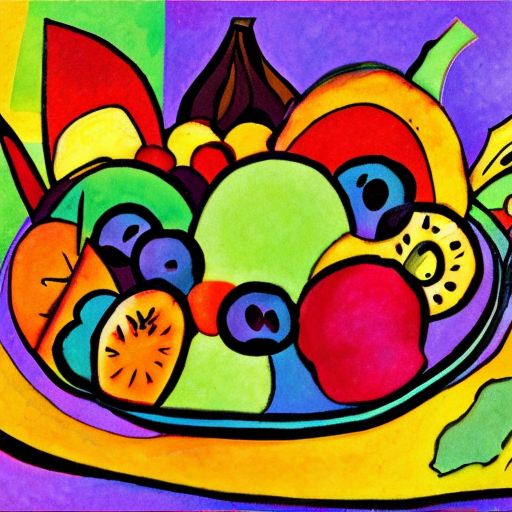

In [10]:
#print(pipe.__dict__)


image = pipe("a bowl of fruit in the style of kandinsky").images[0] 
image 